# Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

In [2]:
from olist.data import Olist
data = Olist().get_data()

Each transaction on the Olist ecommerce platform is characterized by:
- a `customer_id`, that would buy...
- various`product_id`...
- to a `seller_id`...
- and leaves a `review_id`...
- all this belonging to an `order_id`

## 1 - Run an automated exploratory analysis with [ydata-profiling](https://github.com/ydataai/ydata-profiling)

In [3]:
# First, let's install the ydata-profiling package
! pip install --quiet pandas==1.4.4 ydata_profiling==4.1.2

In [4]:
# Then create a "reports" directory
#!mkdir reports

[autoreload of pandas._config.config failed: Traceback (most recent call last):
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    update_instances(old, new)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 303, in update_instances
    object.__setattr__

[autoreload of pandas.core.arrays.period failed: Traceback (most recent call last):
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update

[autoreload of pandas.core.internals.blocks failed: Traceback (most recent call last):
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    upd

[autoreload of pandas.core.groupby.generic failed: Traceback (most recent call last):
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/lucaspancotto/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    upda

In [5]:
# let's import ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport
# choose which datasets to profile
datasets_to_profile = ['orders', 'products', 'sellers',
                  'customers', 'order_reviews',
                  'order_items']

👉 Create and save one `html report` per dataset to profile 

⏳ (It usually takes a few minutes)

In [7]:
profile = ProfileReport(data['products'], title = 'products')
profile.to_file(f"reports/products_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

EOFError: marshal data too short

In [6]:
for d in datasets_to_profile:
    print('exporting: '+ d)
    profile = ProfileReport(data[d], title = d)
    profile.to_file(f"reports/{d}_report.html")

exporting: orders


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

EOFError: marshal data too short

## 2 - Investigate the cardinalities of your various DataFrames

❓ **How many unique `orders`, `reviews`, `sellers`, `products` and `customer` is there ?**  
(You can use ydata-profiling or pandas methods on your notebook if you prefer)

In [11]:
list(data.keys())

['product_category_name_translation',
 'orders',
 'sellers',
 'order_payments',
 'geolocation',
 'order_items',
 'customers',
 'products',
 'order_reviews']

In [30]:
i= 8
print(list(data.keys())[i], ': ')
data[list(data.keys())[i]].nunique()

order_reviews : 


review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [33]:
for name in ['orders',
 'sellers',
  'customers',
 'products',
 'order_reviews']:
    print(name ,': \n \n' , data[name].nunique())

orders : 
 
 order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64
sellers : 
 
 seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64
customers : 
 
 customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64
products : 
 
 product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_w

### 1 - solution

In [34]:
aggregates = np.array([
    [
        data["orders"].order_id.nunique(),
        data["order_reviews"].review_id.nunique(),
        data["sellers"].seller_id.nunique(),
        data["products"].product_id.nunique(),
        data["customers"].customer_id.nunique(),
    ],
    [
        data["orders"].order_id.count(),
        data["order_reviews"].review_id.count(),
        data["sellers"].seller_id.count(),
        data["products"].product_id.count(),
        data["customers"].customer_id.count(),
    ],
])

pd.DataFrame(data=np.vstack((aggregates, aggregates[0,:]/aggregates[1,:])).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
            columns=['nunique', 'count','ratio'])

,nunique,count,ratio
orders,99441.0,99441.0,1.000000
reviews,98410.0,99224.0,0.991796
sellers,3095.0,3095.0,1.000000
products,32951.0,32951.0,1.000000
customers,99441.0,99441.0,1.000000


##

❓ **How many reviews is there per order? Do we have reviews for all orders ?**
<details>
    <summary markdown='span'>Hints</summary>

This info is not directly accessible in your individual csv. You'll need to proceed to merge
</details>

In [41]:
#merge orders with reviews on order id
df = pd.merge(data['orders'] , data['order_reviews'] , how = 'outer' , on = 'order_id')
pd.merge(data['orders'] , data['order_reviews'] , how = 'left' , on = 'order_id').columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [42]:
df[ ['order_id' , 'review_id']]
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


### 2 - solution

In [43]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]
items = data['order_items'][['order_id', 'product_id','seller_id']]

In [44]:
orders_reviews = orders.merge(reviews, on='order_id', how='outer')
orders_reviews.head(2)

,customer_id,order_id,review_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5


In [ ]:
# Check missing reviews?
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

☝️ Nearly all orders have a review, except 768 out of 100k (less than 0.7% missing)

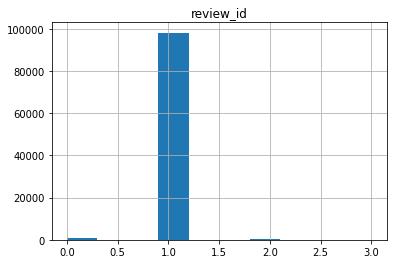

In [ ]:
# We need to add the following magic command to make sure the plot displays correctly!
%matplotlib inline

# Check for max number of reviews per order
orders_reviews.groupby(["order_id", "customer_id"]).count().hist();

☝️ Nearly all orders have only one review per customer. We are safe!

🧪 **Test your code below**

Store the number of orders with missing reviews as `int` in a variable named `n_missing_reviews`

In [ ]:
n_missing_reviews = orders_reviews.isna().sum()['review_id']

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('exploratory',
    n=n_missing_reviews
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bruncky/.pyenv/versions/data-maintenance/bin/python3
cachedir: .pytest_cache
rootdir: /home/bruncky/code/lewagon-dev/Data Content/data-solutions/04-Decision-Science/01-Project-Setup/03-Exploratory-Analysis
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_exploratory.py::TestExploratory::test_n_missing_reviews PASSED [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/exploratory.pickle

git commit -m 'Completed exploratory step'

git push origin master
